udah tau lah ya ngapain

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np

nunjukin kalo datasetnya dah ada dan isinya berapa aja

In [2]:
source_path =r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix"
count=0
count_gambar=[]
for i in os.listdir(source_path):
    banyak_folder=len(os.listdir(source_path))
    banyak_gambar=len(os.listdir(os.path.join(source_path,i)))
    print(f"Banyak gambar file{i}:{banyak_gambar}")
    count+=len(os.listdir(os.path.join(source_path,i)))
    count_gambar.append(len(os.listdir(os.path.join(source_path,i))))
print(f"Banyak gambar:{count}")
print(f"Banyak folder:{banyak_folder}")
print(f"Gambar paling sedikit pada folder:{np.array(count_gambar).min()}")

Banyak gambar fileapple:871
Banyak gambar filebanana:1557
Banyak gambar filechicken curry:1000
Banyak gambar filechicken wings:1000
Banyak gambar filedonuts:1000
Banyak gambar filefrench fries:1000
Banyak gambar filefried chicken:1009
Banyak gambar filefried rice:1000
Banyak gambar filehamburger:1000
Banyak gambar filehot dog:1000
Banyak gambar fileice cream:1000
Banyak gambar fileomelette:1000
Banyak gambar fileonion rings:1000
Banyak gambar fileorange:968
Banyak gambar filepancakes:1000
Banyak gambar filepizza:1000
Banyak gambar filerice:620
Banyak gambar filespaghetti bolognese:1000
Banyak gambar filesushi:1000
Banyak gambar:19025
Banyak folder:19
Gambar paling sedikit pada folder:620


bikin foldernya (pisahin training test ama val)

In [3]:
os.chdir(r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix")
if os.path.isdir(r'D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\train\apple') is False:
  train = os.makedirs('train')
  val = os.makedirs('val')
  test = os.makedirs('test')
  for i in os.listdir(source_path):
      if i!='train' and i!='val' and i!='test': 
        print(i)
        os.makedirs(os.path.join(r'D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\train', i))
        os.makedirs(os.path.join(r'D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\val', i))
        os.makedirs(os.path.join(r'D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\test', i))

apple
banana
chicken curry
chicken wings
donuts
french fries
fried chicken
fried rice
hamburger
hot dog
ice cream
omelette
onion rings
orange
pancakes
pizza
rice
spaghetti bolognese
sushi


masukin dataset ke train tes ama val

In [4]:
def split_data(source_path, training_dir, validation_dir, test_dir):
    dataset=[]
    for unitData in os.listdir(source_path):
        data = source_path + unitData
        if (os.path.getsize(data) > 0):
            dataset.append(unitData)
        else:
            print('Skipped ' + unitData)
            print('Invalid file size! i.e Zero length.')
    train_data_length = 400
    test_data_length = 50
    val_data_length = 50
    shuffled_set = random.sample(dataset, len(dataset))
    train_set = shuffled_set[0:train_data_length]
    val_set = shuffled_set[(train_data_length):(val_data_length+train_data_length)]
    test_set = shuffled_set[-val_data_length:]
    for unitData in train_set:
        temp_train_data = source_path + unitData
        final_train_data = training_dir + unitData
        copyfile(temp_train_data, final_train_data)
    for unitData in val_set:
        temp_train_data = source_path + unitData
        final_train_data = validation_dir + unitData
        copyfile(temp_train_data, final_train_data)  
    for unitData in test_set:
        temp_test_data = source_path + unitData
        final_test_data = test_dir + unitData
        copyfile(temp_test_data, final_test_data)

validation_dir = r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\val"
test_dir = r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\test"
training_dir = r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\dataset\fix\train"
train_dir = []
tests_dir = []
vals_dir = []
sources_dir = []
for i in os.listdir(source_path):
    if i!='train' and i!='val' and i!='test': 
        path0=os.path.join(source_path,f"{i}\\")
        path1=os.path.join(training_dir,f"{i}\\")
        path2=os.path.join(validation_dir,f"{i}\\")
        path3=os.path.join(test_dir,f"{i}\\")
        sources_dir.append(path0)
        train_dir.append(path1)
        tests_dir.append(path2)
        vals_dir.append(path3)
        if len(os.listdir(path1))>0:
            for file in os.scandir(path1):
                os.remove(file.path)
        if len(os.listdir(path2))>0:
            for file in os.scandir(path2):
                os.remove(file.path)
        if len(os.listdir(path3))>0:
            for file in os.scandir(path3):
                os.remove(file.path)
        split_data(path0,path1,path2,path3)
        print(f"\nOriginal {i} directory has {len(os.listdir(path0))} images")
        print(f"There are {len(os.listdir(path1))} images of {i} for training")
        print(f"There are {len(os.listdir(path2))} images of {i} for validation")
        print(f"There are {len(os.listdir(path3))} images of {i} for testing")


Original apple directory has 871 images
There are 400 images of apple for training
There are 50 images of apple for validation
There are 50 images of apple for testing

Original banana directory has 1557 images
There are 400 images of banana for training
There are 50 images of banana for validation
There are 50 images of banana for testing

Original chicken curry directory has 1000 images
There are 400 images of chicken curry for training
There are 50 images of chicken curry for validation
There are 50 images of chicken curry for testing

Original chicken wings directory has 1000 images
There are 400 images of chicken wings for training
There are 50 images of chicken wings for validation
There are 50 images of chicken wings for testing

Original donuts directory has 1000 images
There are 400 images of donuts for training
There are 50 images of donuts for validation
There are 50 images of donuts for testing

Original french fries directory has 1000 images
There are 400 images of french

preprocessing train, val, dan test

In [24]:
def train_val_generators(training_dir,validation_dir,test_dir):
    train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=128,
                                                      target_size=(256, 256))
    validation_datagen = ImageDataGenerator(rescale=1.0/255.)
    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=16,
                                                                target_size=(256, 256))
    test_datagen = ImageDataGenerator(rescale=1.0/255.)
    test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                                batch_size=16,
                                                                target_size=(256, 256))
    return train_generator, validation_generator, test_generator
train_generator, validation_generator, test_generator = train_val_generators(training_dir, validation_dir, test_dir)

Found 7600 images belonging to 19 classes.
Found 950 images belonging to 19 classes.
Found 950 images belonging to 19 classes.


transfer learning menggunakan Inception diimport dulu

In [6]:
from keras.applications import InceptionV3
model = InceptionV3(weights='imagenet')
print(model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

model

In [17]:
InceptionV3_model = InceptionV3(input_shape=(256,256,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:249]:
   layer.trainable = False
for layer in InceptionV3_model.layers[249:]:
   layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = tf.keras.layers.Flatten()(InceptionV3_last_output)
InceptionV3_x = tf.keras.layers.Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = tf.keras.layers.Dropout(0.5)(InceptionV3_x)
InceptionV3_x = tf.keras.layers.Dense(19, activation='softmax')(InceptionV3_x)
InceptionV3_x_final_model = tf.keras.Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

number_of_epochs = 20
inception_filepath = 'inceptionv3_'+'-saved-model-{epoch:02d}-loss-{loss:.2f}.hdf5'
inception_checkpoint = tf.keras.callbacks.ModelCheckpoint(inception_filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
inception_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
inceptionv3_history = InceptionV3_x_final_model.fit(train_generator, epochs = number_of_epochs, validation_data = validation_generator,callbacks=[inception_checkpoint,inception_early_stopping],verbose=1)

Epoch 1/20
60/60 [==============================] - ETA: 0s - loss: 2.1305 - accuracy: 0.3893 
Epoch 1: accuracy improved from -inf to 0.38934, saving model to inceptionv3_-saved-model-01-loss-2.13.hdf5
60/60 [==============================] - 1484s 24s/step - loss: 2.1305 - accuracy: 0.3893 - val_loss: 0.9331 - val_accuracy: 0.7189
Epoch 2/20
60/60 [==============================] - ETA: 0s - loss: 1.1056 - accuracy: 0.6732 
Epoch 2: accuracy improved from 0.38934 to 0.67316, saving model to inceptionv3_-saved-model-02-loss-1.11.hdf5
60/60 [==============================] - 1219s 20s/step - loss: 1.1056 - accuracy: 0.6732 - val_loss: 0.7093 - val_accuracy: 0.7905
Epoch 3/20
60/60 [==============================] - ETA: 0s - loss: 0.8829 - accuracy: 0.7333 
Epoch 3: accuracy improved from 0.67316 to 0.73329, saving model to inceptionv3_-saved-model-03-loss-0.88.hdf5
60/60 [==============================] - 1225s 20s/step - loss: 0.8829 - accuracy: 0.7333 - val_loss: 0.5890 - val_accura

visualisasi biar keliatan gimana per epochnya kek kehidupan naik turun

Text(0.5, 1.0, 'Training and validation loss')

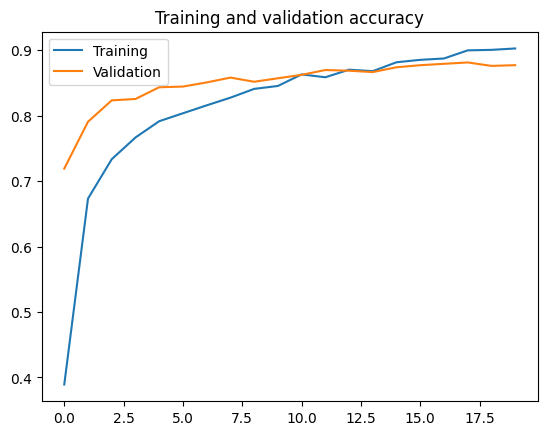

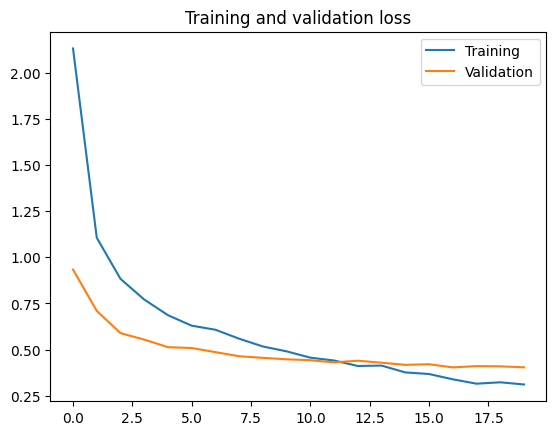

In [18]:
acc      = inceptionv3_history.history[     'accuracy' ]
val_acc  = inceptionv3_history.history[ 'val_accuracy' ]
loss     = inceptionv3_history.history[    'loss' ]
val_loss = inceptionv3_history.history['val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

di save biar ga stress nungguin lagi

In [19]:
saved_model_path = r"D:\natasha\kuliah\sem 6\bangkit\coba python\project capstone\mymodelhopefullyfinal.h5"
InceptionV3_x_final_model.save(saved_model_path)
